# What's new since last year's UGM?
# 2019 RDKit UGM Edition

Not an exhaustive list, just some examples. Covers 2018.09, 2019.03, and some of the forthcoming 2019.09 release.

## Big code changes




### Backwards incompatible changes
(Ongoing)

We've started to gradually make changes to the code that may be either backwards incompatible or may change the default results. These are documented in a section of the release notes and are generally tagged with `Changes Results` in github.

Here are examples from the three releases covered here:
#### 2018.09
```
This release includes a set of changes to make the default arguments to common
functions less error prone (github #1679).
- GetAtomSmiles() now generates isomeric SMILES by default.
- The ringMatchesRingOnly option to the FindMCS() function now applies to
  atom-atom matches as well as bond-bond matches.
- The Python functions EmbedMolecule() and EmbedMultipleConfs() now use the
  ETKDG algorithm by default instead of standard distance geometry.
```
#### 2019.03
```
- The fix for github #2245 means that the default behavior of the MaxMinPicker
  is now truly random. If you would like to reproduce the previous behavior,
  provide a seed value of 42.
- The uncharging method in the MolStandardizer now attempts to generate
  canonical results for a given molecule. This may result in different output
  for some molecules.
```
#### 2019.09 (not yet complete)
```
- The atomic van der Waals radii used by the RDKit were corrected/updated in #2154.
  This leads to different results when generating conformations, molecular volumes,
  and molecular shapes. 
- As part of the enhancements to the MolDraw2D class, we changed the type of
  DrawColour from a tuple to be an actual struct. We also added a 4th element to
  capture alpha values. This should have no affect on Python code (the alpha
  value is optional when providing color tuples), but will require changes to C++
  and Java/C# code that is using DrawColour.
- When reading Mol blocks, atoms with the symbol "R" are now converted into
  queries that match any atom when doing a substructure search (analogous to "*"
  in SMARTS). The previous behavior was to only match other dummy atoms/
- When loading SDF files using PandasTools.LoadSDF(), we now default to
  producing isomeric smiles in pandas tables.  To reproduce the original
  behavior, use isomericSmiles=False in the call to the function.
- The SMARTS generated by the RDKit no longer contains redundant wildcard
  queries. This means the SMARTS strings generated by this release will generally
  be different from that in previous releases, although the results produced by
  the queries should not change.
```

### Move from epydoc to sphinx autodoc (affects documentation)
(Release 2018.09)

epydoc is no longer maintained and does not work with Python 3. Sphinx autodoc is under active development, integrates better with the rest of the RDKit documentation system, and looks better. Unfortunately some documentation needs to be reformatted in order to look good; this is an ongoing process. *You* can help here!


## 2019 Google Summer of Code Project

RDKit-Neo4J integration

Student: Evgeniy Sorokin

Mentors: Christian Pilger (BASF), Stefan Armbruster (Neo4J), Greg Landrum

GitHub URL: https://github.com/rdkit/neo4j-rdkit

Allows using molecules as properties of nodes in Neo4J. Can do exact structure, substructure, and similarity searches (similarity search implemementation needs some work still)


## New Features

 - [Bit visualization](#Fingerprint-bit-visualization)
 - [SVGs with chemical metadata and/or interaction points](#SVGs-with-chemical-metadata)
 - [Simplified Javascript bindings](#Simplified-Javascript-bindings)
 - [Integration of semi-empirical QM calculations using YAeHMOP](#YAeHMOP-integration)
 - [Atom properties in SDF files](#Atom-Properties-in-SDF-files)
 - [NextMove Software's MolHash](#MolHash-integration)
 - MolVS integration (2018 GSoC project)
 - Generalized fingerprinter (2018 GSoC project)
 - Reading/writing extended stereochemistry from v3000 mol blocks (more on this from Dan later)
 - Reading/writing SGroup data from mol blocks
 - [Integration of the RingDecomposerLib](#Integration-of-RingDecomposerLib) library from Florian Flachsenberg (2019.09)
 

 
Some for which the PR is still being reviewed:


 
Hopefully these will also make it into the 2019.09 release


## Fingerprint bit visualization 
(2018.09 release)

Nadine Schneider's fingerprint bit visualization code from [CheTo](https://github.com/rdkit/CheTo) has been adapted and added to the RDKit core.

*Note*: At the moment this code is still in Python. It will be ported to C++ in a future release to allow it to be used more broadly.

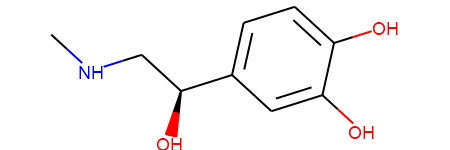

In [99]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
epinephrine = Chem.MolFromSmiles('CNC[C@H](O)c1ccc(O)c(O)c1')
epinephrine

In [100]:
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(epinephrine, radius=2, bitInfo=bi)
list(fp.GetOnBits())[:10]

[1, 80, 227, 315, 589, 606, 632, 807, 875, 1057]

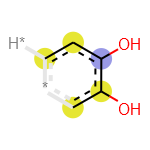

In [101]:
Draw.DrawMorganBit(epinephrine,589,bi)

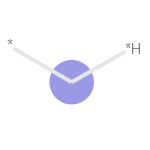

In [102]:
Draw.DrawMorganBit(epinephrine,80,bi)

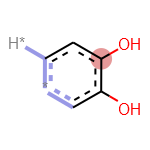

In [103]:
Draw.DrawMorganBit(epinephrine,589,bi,aromaticColor=None,ringColor=None,extraColor=(.6,.6,.9),centerColor=(.9,.6,.6))

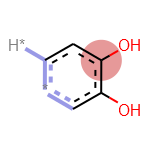

In [104]:
Draw.DrawMorganBit(epinephrine,589,bi,aromaticColor=None,ringColor=None,extraColor=(.6,.6,.9),centerColor=(.9,.6,.6),baseRad=0.6)

In [105]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(epinephrine, maxPath=5, bitInfo=rdkbi)
list(rdkfp.GetOnBits())[:10]

[93, 103, 112, 122, 148, 149, 161, 166, 194, 208]

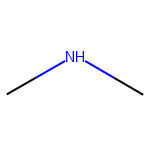

In [106]:
Draw.DrawRDKitBit(epinephrine,166,rdkbi)

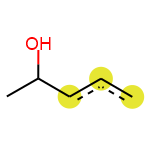

In [107]:
Draw.DrawRDKitBit(epinephrine,222,rdkbi)

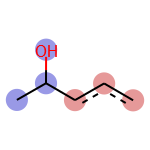

In [109]:
Draw.DrawRDKitBit(epinephrine,222,rdkbi,aromaticColor=(.9,.6,.6),nonAromaticColor=(.6,.6,.9))

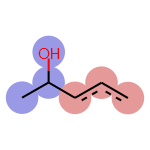

In [110]:
Draw.DrawRDKitBit(epinephrine,222,rdkbi,aromaticColor=(.9,.6,.6),nonAromaticColor=(.6,.6,.9),baseRad=.5)

In [111]:
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))


In [112]:
interact(renderFpBit, bitIdx=list(bi.keys()),mol=fixed(epinephrine),bitInfo=fixed(bi),fn=fixed(Draw.DrawMorganBit));

interactive(children=(Dropdown(description='bitIdx', options=(1, 80, 227, 315, 589, 606, 632, 807, 875, 1057, …

In [113]:
interact(renderFpBit, bitIdx=list(rdkbi.keys()),mol=fixed(epinephrine),bitInfo=fixed(rdkbi),fn=fixed(Draw.DrawRDKitBit));

interactive(children=(Dropdown(description='bitIdx', options=(93, 103, 112, 122, 148, 149, 161, 166, 194, 208,…

## SVGs with chemical metadata

It's now possible to add some RDKit-specific metadata to the SVG output by the `MolDraw2DSVG` object and construct molecules from that data.

This is still beta level, and we can't guarantee backwards compatibility between releases (though we'll certainly try), but I'd love to get some feedback on whether or not it's useful.

In [114]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from IPython.display import SVG

In [115]:
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
ddoravirine = Draw.PrepareMolForDrawing(doravirine)

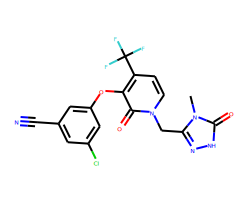

In [116]:
d = Draw.MolDraw2DSVG(250,200)
d.DrawMolecule(ddoravirine)
d.AddMoleculeMetadata(ddoravirine)
d.FinishDrawing()
svg = d.GetDrawingText()
SVG(svg)

In [117]:
print(svg)

<?xml version='1.0' encoding='iso-8859-1'?>
<svg version='1.1' baseProfile='full'
              xmlns='http://www.w3.org/2000/svg'
                      xmlns:rdkit='http://www.rdkit.org/xml'
                      xmlns:xlink='http://www.w3.org/1999/xlink'
                  xml:space='preserve'
width='250px' height='200px' >
<!-- END OF HEADER -->
<rect style='opacity:1.0;fill:#FFFFFF;stroke:none' width='250' height='200' x='0' y='0'> </rect>
<path class='bond-0' d='M 190.464,96.0401 L 192.56,104.336' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />
<path class='bond-0' d='M 192.56,104.336 L 194.656,112.632' style='fill:none;fill-rule:evenodd;stroke:#0000FF;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />
<path class='bond-1' d='M 192.655,119.52 L 187.474,125.735' style='fill:none;fill-rule:evenodd;stroke:#0000FF;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stro

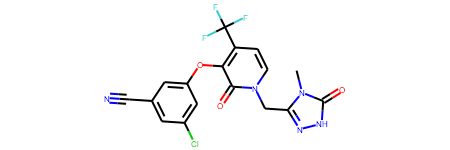

In [118]:
nm = Chem.MolFromRDKitSVG(svg)
nm.ClearComputedProps()
Chem.SanitizeMol(nm)
nm

In [119]:
Chem.MolToSmiles(nm) == Chem.MolToSmiles(doravirine)

True

### Interactive SVGs:

More info on this here: http://rdkit.blogspot.com/2019/08/an-interactive-rdkit-widget-for-jupyter.html

In [120]:
import ipywidgets as widgets
from traitlets import Unicode, Int, validate
class MolSVGWidget(widgets.DOMWidget):
    _view_name = Unicode('MolSVGView').tag(sync=True)
    _view_module = Unicode('molsvg_widget').tag(sync=True)
    _view_module_version = Unicode('0.0.1').tag(sync=True)
    
    svg = Unicode('', help="svg to be rendered").tag(sync=True)
    selected_atoms = Unicode('', help="list of currently selected atoms").tag(sync=True)

In [121]:
%%javascript
// make sure our module is only defined
// only once.
require.undef('molsvg_widget');

// Define the `molsvg_widget` module using the Jupyter widgets framework.
define('molsvg_widget', ["@jupyter-widgets/base"],
       function(widgets) {

    // The frontend class:
    var MolSVGView = widgets.DOMWidgetView.extend({

        // This method creates the HTML widget.
        render: function() {
            this.svg_div = document.createElement('div');
            this.el.appendChild(this.svg_div);
            this.model.on('change:svg', this.svg_changed, this);
            this.svg_changed();
        },
        
        // called when the SVG is updated on the Python side
        svg_changed: function() {
            var txt = this.model.get('svg'); 
            this.svg_div.innerHTML = txt;
            var sels = this.svg_div.getElementsByClassName("atom-selector");
            for(var i=0;i<sels.length;i++){
                sels[i].onclick = (evt) => { return this.atom_clicked(evt) };
            }
            
        },

        // callback for when an atom is clicked
        atom_clicked: function(evt) {
            //alert("  "+evt+"|"+this);
            if(!evt.currentTarget.getAttribute('class')){
                return;
            }
            var satmid = evt.currentTarget.getAttribute('class').match(/atom-([0-9]+)/);
            if(satmid.length >1){
                var atmid = Number(satmid[1]);
                var curSel = this.model.get('selected_atoms');
                var splitSel = curSel.split(',');
                var selItms = [];
                var idx = -1;
                //alert("|"+atmid+"|"+curSel+"|len: "+splitSel.length);
                if(curSel != "" && splitSel.length>0){
                    selItms = Array.from(splitSel).map(item => Number(item));
                    idx = selItms.indexOf(atmid);
                }
                if(idx == -1){
                    selItms = selItms.concat(atmid);
                    evt.currentTarget.style["stroke-width"]=3;
                    evt.currentTarget.style["stroke-opacity"]=1;
                    evt.currentTarget.style["stroke"]='#AA22FF';
                } else {
                    selItms.splice(idx,1);
                    evt.currentTarget.style["stroke-width"]=1;
                    evt.currentTarget.style["stroke-opacity"]=0;
                    evt.currentTarget.style["stroke"]='#FFFFFF';
                }
                this.model.set('selected_atoms',String(selItms));
                this.touch();
            }
        }

    });

    return {
        MolSVGView : MolSVGView
    };
});

<IPython.core.display.Javascript object>

In [122]:
d = Draw.MolDraw2DSVG(350,300)
d.DrawMolecule(ddoravirine)
d.TagAtoms(ddoravirine)
d.FinishDrawing()
svg = d.GetDrawingText()
w = MolSVGWidget(svg=svg)
w

MolSVGWidget(svg="<?xml version='1.0' encoding='iso-8859-1'?>\n<svg version='1.1' baseProfile='full'\n        …

In [123]:
w.selected_atoms

'10,9,8'

In [25]:
print(svg)

<?xml version='1.0' encoding='iso-8859-1'?>
<svg version='1.1' baseProfile='full'
              xmlns='http://www.w3.org/2000/svg'
                      xmlns:rdkit='http://www.rdkit.org/xml'
                      xmlns:xlink='http://www.w3.org/1999/xlink'
                  xml:space='preserve'
width='350px' height='300px' >
<!-- END OF HEADER -->
<rect style='opacity:1.0;fill:#FFFFFF;stroke:none' width='350' height='300' x='0' y='0'> </rect>
<path class='bond-0' d='M 266.65,144.456 L 269.584,156.07' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />
<path class='bond-0' d='M 269.584,156.07 L 272.519,167.685' style='fill:none;fill-rule:evenodd;stroke:#0000FF;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />
<path class='bond-1' d='M 269.717,177.329 L 262.463,186.028' style='fill:none;fill-rule:evenodd;stroke:#0000FF;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stro

## Simplified Javascript bindings
(2019.09 release)

We've added a simplified version of the RDKit JavaScript bindings to the core distribution.

The idea is to keep this fairly minimal, to expose on the most important functionality.

The current wrappers allow:
- parsing SMILES, SMARTS, or Mol blocks
- generating SMILES, Mol blocks, InChIs, and InChI keys
- calculating a set of 2D descriptors
- getting morgan fingerprints
- doing substructure searches
- generating SVG

A very basic demo of what's currently possible is here: https://www.rdkit.org/temp/demo/demo.html
This will likely move to a more permanent location at some point in the not-too-distant future

We're looking for feedback on what should be added to these wrappers.

## MolHash integration
(2019.09 release, hopefully)

A very flexible molecular hashing scheme allowing a molecule to be hashed at multiple levels of detail

For more information see [Noel's ACS talk](https://www.nextmovesoftware.com/talks/OBoyle_MolHash_ACS_201908.pdf).

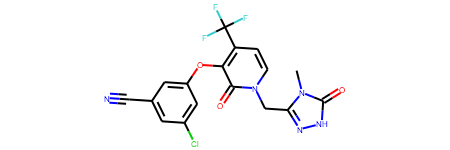

In [26]:
from rdkit.Chem import rdMolHash
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
doravirine
           

In [27]:
# some of the options available:
print('canonical smiles:',rdMolHash.MolHash(doravirine,rdMolHash.HashFunction.CanonicalSmiles))
print('element graph:',rdMolHash.MolHash(doravirine,rdMolHash.HashFunction.ElementGraph))
print('anonymous graph:',rdMolHash.MolHash(doravirine,rdMolHash.HashFunction.AnonymousGraph))
print('tautomers:',rdMolHash.MolHash(doravirine,rdMolHash.HashFunction.HetAtomTautomer))


canonical smiles: Cn1c(Cn2ccc(C(F)(F)F)c(Oc3cc(Cl)cc(C#N)c3)c2=O)n[nH]c1=O
element graph: CN1C(O)NNC1CN1CCC(C(F)(F)F)C(OC2CC(Cl)CC(CN)C2)C1O
anonymous graph: ***1**(*)**(**2*(*(*)(*)*)***(**3***(*)*3*)*2*)*1
tautomers: CN1[C]([O])[N][N][C]1CN1[CH][CH][C](C(F)(F)F)[C](O[C]2[CH][C](Cl)[CH][C]([C][N])[CH]2)[C]1[O]_1_0


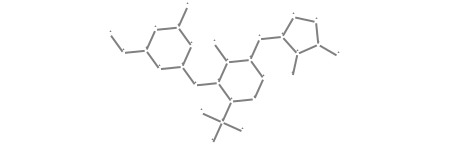

In [28]:
Chem.MolFromSmiles(rdMolHash.MolHash(doravirine,rdMolHash.HashFunction.AnonymousGraph))

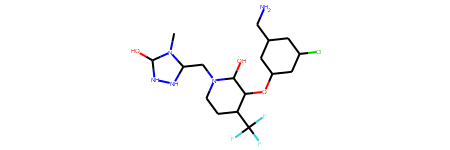

In [29]:
Chem.MolFromSmiles(rdMolHash.MolHash(doravirine,rdMolHash.HashFunction.ElementGraph))

## YAeHMOP integration
(2019.03 release)

We added integration with [YAeHMOP](https://github.com/greglandrum/yaehmop), a package for doing extended Hueckel calculations.

In [30]:
from rdkit.Chem import rdEHTTools
from rdkit.Chem import AllChem
doravirine = Chem.AddHs(Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F'))
AllChem.EmbedMolecule(doravirine)
ok,res = rdEHTTools.RunMol(doravirine)

Partial charges are available:

In [31]:
res.GetAtomicCharges()

array([ 1.66704406e-01, -1.15239669e-01,  6.66040095e-01, -8.38235982e-01,
        2.88547480e-02,  1.06223474e+00, -1.25233534e+00,  2.29836461e-01,
       -4.25412400e-02,  2.27549420e-01, -1.15630266e-01,  3.00250327e-02,
        3.81220546e-01,  8.27423425e-01, -1.27024601e+00, -6.28496659e-01,
        4.79237741e-01, -8.88854053e-02,  1.05953522e-01, -8.19797196e-02,
        3.22605668e-01, -1.52052252e-01, -1.10928469e-01,  7.68194344e-01,
       -1.00232452e+00,  1.84058776e+00, -5.91662630e-01, -6.14076022e-01,
       -6.16256910e-01,  8.96676381e-05,  1.86842471e-02,  1.25269080e-02,
        2.13655808e-01,  3.44664825e-03,  8.19074609e-03,  2.95229857e-02,
        2.93669861e-02,  1.96499760e-02,  2.13105589e-02,  2.79783707e-02])

The reduced overlap population tells you about the strength of the interaction between atoms:

In [32]:
res.GetReducedOverlapPopulationMatrix()

array([ 2.38426410e+00,  7.09272081e-01,  4.01240146e+00, -7.20094168e-02,
        9.80898239e-01,  2.17284709e+00,  1.04704643e-03, -1.02647808e-01,
        9.88688084e-01,  5.14591715e+00,  1.05548723e-03, -7.83301607e-02,
       -1.24534801e-01,  7.56156712e-01,  3.85364590e+00, -6.69225220e-02,
        9.31170072e-01, -1.23089518e-01, -1.46045421e-01,  1.01829493e+00,
        1.77143606e+00, -3.89255543e-03, -5.09590819e-02,  5.34368758e-04,
        5.69818014e-04, -5.08135031e-02,  7.87405596e-01,  6.91140310e+00,
       -8.16534011e-03, -5.45055092e-02,  8.33255083e-01, -6.00060623e-02,
        9.18111450e-04,  1.63525539e-03, -1.01747837e-05,  2.38482354e+00,
        7.21497558e-05, -5.52476693e-04, -4.06764469e-02, -1.42247900e-03,
        1.59787183e-05, -8.32602139e-06, -4.06392475e-08,  6.73085014e-01,
        3.94748221e+00, -7.91149322e-06,  2.73202548e-05, -7.40399792e-03,
        6.17525627e-06, -1.27917669e-05, -1.27955035e-05,  1.15104783e-08,
       -8.31611776e-02,  

And it's pretty quick:

In [33]:
%timeit _ = rdEHTTools.RunMol(doravirine)

55 ms ± 4.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Atom Properties in SDF files
(2019.03 release)

A convention for storing/retrieving atomic properties from SDF files.

In [34]:
sdf=b"""property_example
    RDKit  2D

  3  3  0  0  0  0  0  0  0  0999 V2000
    0.8660    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4330    0.7500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4330   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  1  1  0
M  END
>  <atom.dprop.PartialCharge>  (1)
0.008 -0.314 0.008

>  <atom.iprop.NumHeavyNeighbors>  (1)
2 2 2

>  <atom.prop.AtomLabel>  (1)
C1 N2 C3

>  <atom.bprop.IsCarbon>  (1)
1 0 1

>  <atom.prop.PartiallyMissing>  (1)
one n/a three

>  <atom.iprop.PartiallyMissingInt>  (1)
[?] 2 2 ?

$$$$
"""
from io import BytesIO
sio = BytesIO(sdf)
suppl = Chem.ForwardSDMolSupplier(sio)
m = next(suppl)
m.GetAtomWithIdx(0).GetDoubleProp('PartialCharge')

0.008

Creating those lists for output:

In [35]:
from rdkit.Chem import rdDistGeom
m = Chem.MolFromSmiles('NC=O')
mh = Chem.AddHs(m)
rdDistGeom.EmbedMolecule(mh)
_,res = rdEHTTools.RunMol(mh)
charges = res.GetAtomicCharges()
for i,at in enumerate(m.GetAtoms()):
    chg = charges[i]
    # we are only writing heavy atoms, so condense the H charges:
    for nbr in mh.GetAtomWithIdx(i).GetNeighbors():
        if nbr.GetAtomicNum()==1:
            chg += charges[nbr.GetIdx()]
    at.SetDoubleProp('PartialCharge',chg)
Chem.CreateAtomDoublePropertyList(m,"PartialCharge")

# show that it works:
from io import StringIO
sio = StringIO()
w = Chem.SDWriter(sio)
w.write(m)
w.flush()
print(sio.getvalue())


     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
    1.2990    0.7500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
M  END
>  <atom.dprop.PartialCharge>  (1) 
-0.12470440394083937 1.2451801584466011 -1.1204755353337532

$$$$



## Integration of RingDecomposerLib

In [77]:
smi = 'C1C2=CC=C(CC3=CC=C(CC4=CC=C(CC5=CC=C1C=C5)C=C4)C=C3)C=C2'
m = Chem.MolFromSmiles(smi,sanitize=False)
m.UpdatePropertyCache()

In [78]:
Chem.FindRingFamilies(m)
ri = m.GetRingInfo()
ri.NumRingFamilies()

5

In [79]:
for fam in ri.AtomRingFamilies():
    print(fam)

(6, 7, 8, 9, 24, 25)
(11, 12, 13, 14, 22, 23)
(16, 17, 18, 19, 20, 21)
(1, 2, 3, 4, 26, 27)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27)


In [98]:
# The RDKit does a crappy job of drawing these molecules;
# use coordgen instead
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)

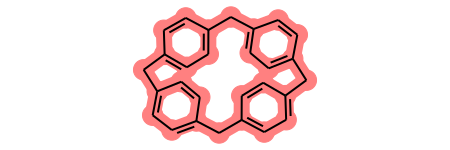

In [97]:
rdDepictor.Compute2DCoords(m)
m.__sssAtoms = ri.AtomRingFamilies()[-1]
m

In [80]:
m2 = Chem.MolFromSmiles(smi,sanitize=False)
m2.UpdatePropertyCache()

In [81]:
Chem.GetSymmSSSR(m2)
ri2 = m2.GetRingInfo()

In [82]:
for ring in ri2.AtomRings():
    print(ring)

(2, 3, 4, 26, 27, 1)
(7, 8, 9, 24, 25, 6)
(12, 13, 14, 22, 23, 11)
(17, 18, 19, 20, 21, 16)
(0, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 23, 22, 14, 15, 16, 17, 18, 19, 0, 1)
(26, 27, 1, 0, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4)
(26, 27, 1, 0, 19, 18, 17, 16, 15, 14, 22, 23, 11, 10, 9, 8, 7, 6, 5, 4)
(17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 25, 24, 9, 10, 11, 12, 13, 14, 15, 16)
(20, 21, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 19)
(20, 21, 16, 15, 14, 13, 12, 11, 10, 9, 24, 25, 6, 5, 4, 3, 2, 1, 0, 19)


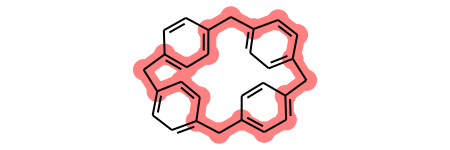

In [84]:
rdDepictor.Compute2DCoords(m2)
m2.__sssAtoms = ri2.AtomRings()[-1]
m2

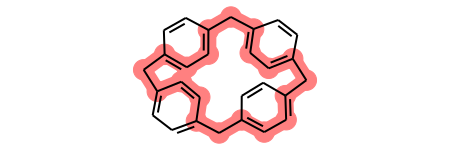

In [85]:
m2.__sssAtoms = ri2.AtomRings()[-2]
m2

In [92]:
%timeit m.ClearComputedProps();Chem.FindRingFamilies(m)

87.1 µs ± 2.44 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [93]:
%timeit m2.ClearComputedProps();Chem.GetSymmSSSR(m2)

242 µs ± 5.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
